In [1]:
#@title Code - Load dependencies

#general
import io

# data
import numpy as np
import pandas as pd

# machine learning
import keras

# data visualization
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

2025-04-28 12:47:30.776435: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
chicago_taxi_dataset=pd.read_csv("https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv")

In [3]:
chicago_taxi_dataset

,TRIP_START_TIMESTAMP,TRIP_END_TIMESTAMP,TRIP_START_HOUR,TRIP_SECONDS,TRIP_MILES,TRIP_SPEED,PICKUP_CENSUS_TRACT,DROPOFF_CENSUS_TRACT,PICKUP_COMMUNITY_AREA,DROPOFF_COMMUNITY_AREA,FARE,TIPS,TIP_RATE,TOLLS,EXTRAS,TRIP_TOTAL,PAYMENT_TYPE,COMPANY
0,05/17/2022 7:15:00 AM,05/17/2022 7:45:00 AM,7.25,2341,2.57,4.0,NaN,NaN,NaN,17.0,31.99,2.00,6.3,0.0,0.0,33.99,Mobile,Flash Cab
1,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,1074,1.18,4.0,NaN,1.703108e+10,NaN,8.0,9.75,3.00,27.9,0.0,1.0,14.25,Credit Card,Flash Cab
2,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,1173,1.29,4.0,1.703132e+10,1.703108e+10,32.0,8.0,10.25,0.00,0.0,0.0,0.0,10.25,Cash,Sun Taxi
3,05/17/2022 6:00:00 PM,05/17/2022 7:00:00 PM,18.00,3360,3.70,4.0,1.703132e+10,1.703124e+10,32.0,24.0,23.75,0.00,0.0,0.0,1.0,24.75,Cash,Choice Taxi Association
4,05/17/2022 5:00:00 PM,05/17/2022 5:30:00 PM,17.00,1044,1.15,4.0,1.703132e+10,1.703108e+10,32.0,8.0,10.00,0.00,0.0,0.0,0.0,10.00,Cash,Flash Cab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31689,05/17/2022 1:15:00 PM,05/17/2022 1:30:00 PM,13.25,739,13.06,63.6,NaN,NaN,75.0,28.0,32.50,0.00,0.0,0.0,0.0,32.50,Prcard,Blue Ribbon Taxi Association
31690,05/17/2022 9:45:00 PM,05/17/2022 10:15:00 PM,21.75,1740,30.90,63.9,NaN,NaN,76.0,NaN,44.50,10.00,13.9,0.0,27.5,82.00,Credit Card,Choice Taxi Association
31691,05/18/2022 3:45:00 AM,05/18/2022 4:00:00 AM,3.75,687,12.21,64.0,NaN,NaN,22.0,NaN,30.75,0.00,0.0,0.0,0.0,30.75,Prcard,Sun Taxi
31692,05/16/2022 2:45:00 PM,05/16/2022 3:30:00 PM,14.75,2040,36.60,64.6,NaN,NaN,76.0,7.0,41.75,11.55,25.2,0.0,4.0,57.30,Credit Card,"Taxicab Insurance Agency, LLC"


taking features for training dataset

In [4]:
training_df=chicago_taxi_dataset[['TRIP_MILES',"TRIP_SECONDS",'FARE','COMPANY',"PAYMENT_TYPE",'TIP_RATE']]
print('Read dataset completed successfully.')
print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.head(200)

Read dataset completed successfully.
Total number of rows: 31694




,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
0,2.57,2341,31.99,Flash Cab,Mobile,6.3
1,1.18,1074,9.75,Flash Cab,Credit Card,27.9
2,1.29,1173,10.25,Sun Taxi,Cash,0.0
3,3.70,3360,23.75,Choice Taxi Association,Cash,0.0
4,1.15,1044,10.00,Flash Cab,Cash,0.0
...,...,...,...,...,...,...
195,1.13,821,9.00,Blue Ribbon Taxi Association,Mobile,22.9
196,0.57,414,6.00,Flash Cab,Cash,0.0
197,1.22,886,9.00,City Service,Cash,0.0
198,1.68,1219,9.00,Sun Taxi,Mobile,23.0


In [5]:
training_df.describe()

,TRIP_MILES,TRIP_SECONDS,FARE,TIP_RATE
count,31694.000000,31694.000000,31694.000000,31694.000000
mean,8.289463,1319.796397,23.905210,12.965785
std,7.265672,928.932873,16.970022,15.517765
min,0.500000,60.000000,3.250000,0.000000
25%,1.720000,548.000000,9.000000,0.000000
50%,5.920000,1081.000000,18.750000,12.200000
75%,14.500000,1888.000000,38.750000,20.800000
max,68.120000,7140.000000,159.250000,648.600000


MAKING COREALATION MATRIX

In [6]:
training_df.corr(numeric_only=True)

,TRIP_MILES,TRIP_SECONDS,FARE,TIP_RATE
TRIP_MILES,1.000000,0.800855,0.975344,-0.049594
TRIP_SECONDS,0.800855,1.000000,0.830292,-0.084294
FARE,0.975344,0.830292,1.000000,-0.070979
TIP_RATE,-0.049594,-0.084294,-0.070979,1.000000


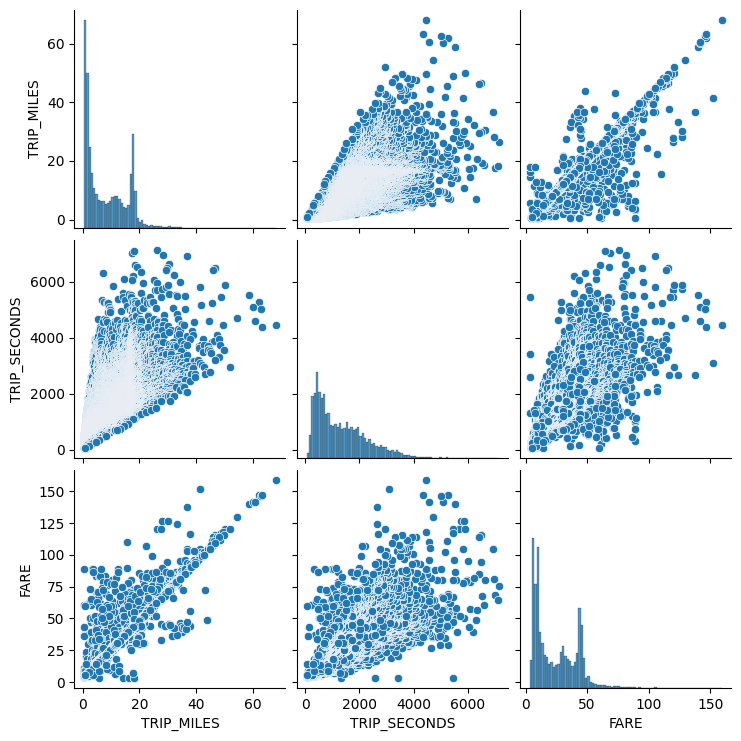

In [7]:
sns.pairplot(training_df,x_vars=['TRIP_MILES',"TRIP_SECONDS",'FARE'],y_vars=['TRIP_MILES','TRIP_SECONDS','FARE'])

***making visulaization pipeline:***

In [8]:
def make_plots(df,feature_names,label_name,model_output,sample_size=200):
    random_sample=df.sample(n=sample_size).copy()
    random_sample.reset_index()
    weights,bias,epochs,rmse=model_output
    is_2d_plot=len(feature_names)==1
    model_plot_type='scatter' if is_2d_plot else 'surface'
    fig=make_subplots(rows=1,cols=2,subplot_titles=('Loss Curve','Model plot'),
                      specs=[[{'Type':'scatter'},{'Type':model_plot_type}]])
    plot_data(random_sample, feature_names, label_name, fig)
    plot_model(random_sample, feature_names, weights, bias, fig)
    plot_loss_curve(epochs, rmse, fig)
    fig.show()
    return 
def plot_loss_curve(epochs,rmse,fig):
    curve=px.line(x=epochs,y=rmse)
    curve.update_traces(line_color='red',line_width=3)
    fig.append_trace(curve.data[0],row=1,col=1)
    fig.update_xaxes(title_text='epochs',row=1,col=1)
    fig.update_yaxes(titel_text='Root Mean Squared Error',row=1,col=1,range=[rmse.min()*0.8,rmse.max()])

    return
def plot_data(df,features,label,fig):
    if len(features)==1:
        scatter=px.scatter(df,x=features[0],y=label)
    else:
        scatter=px.scatter_3d(df,x=features[0],y=features[1],z=label)
    fig.append_trace(scatter.data[0],row=1,col=2)
    if len(features)==1:
        fig.update_xaxes(title_text=features[0],row=1,col=2)
        fig.update_yaxes(title_text=label,row=1,col=2)
    else:
        fig.update_layout(scene1=dict(xaxis_title=features[0],yaxis_title=features[1],zaxis_title=label))

    return
def plot_model(df,features,weights,bias,fig):
    df["Fare_Predicted"]=bias[0]
    for index,feature in enumerate(features):
      df["Fare_Predicted"]=df["Fare_Predicted"]+weights[index][0]*df[feature]
    if len(features)==1:
      model=px.line(df,x=features[0],y='Fare_Predicted')
      model.upadte_traces(line_color='red',line_width=3)  
    else:
        z_name,y_name='Fare_Predicted',features[1]
        z=[df[z_name].min(),(df[z_name].max()-df[z_name].min())/2,df[z_name].max()]
        y=[df[y_name].min(),(df[y_name].max()-df[y_name].min())/2,df[y_name].max()]
        x=[]
        for i in range(len(y)):
            x.append((z[i]-weights[1][0]-bias[0])/weights[0][0])
        plane=pd.DataFrame({'x':x,'y':y,'z':z})
        light_yellow = [[0, '#89CFF0'], [1, '#FFDB58']]
        model=go.figure(data=go.surface(x=plane['x'],y=plane['y'],z=plane['z'],colorscale=light_yellow))
        fig.add_reace(model.data[0],row=1,col=2)

        return
def model_info(feature_names,label_names,model_output):
    weights=model_output[0]
    bias=model_output[1]
    nl = "\n"
    header = "-" * 80
    banner = header + nl + "|" + "MODEL INFO".center(78) + "|" + nl + header
    info=""
    equaction=label_names + ' = '
    for index, feature in enumerate(feature_names):
       info = info + "Weight for feature[{}]: {:.3f}\n".format(feature, weights[index][0])
       equation = equation + "{:.3f} * {} + ".format(weights[index][0], feature)

    info = info + "Bias: {:.3f}\n".format(bias[0])
    equation = equation + "{:.3f}\n".format(bias[0])

    return banner + nl + info + nl + equation

print("SUCCESS: defining plotting functions complete.")





SUCCESS: defining plotting functions complete.


**Defining functions to train a model:**

In [ ]:
def build_model(my_learning_rate,num_features):
    inputs=keras.input(shape=(num_features,))
    outputs=keras.layers.Dense(unit=1)(inputs)
    model=keras.Model(inputs=inputs,outputs=outputs)
    model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                  loss='mean_squared_error',
                  metrics=['mean_absolute_error'])
    return model
def train_model(model,features,label,epochs,batch_size):
    history=model.fit(x=features,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)
    train_weights=model.get_weights()[0]
    train_bias=model.get_weights()[1]
    epochs=history.epoch
    hist=pd.DataFrame(history.history)
    rmse=hist['root_mean_squared_error']
    return train_weights,train_bias,epochs,rmse
def run_experiment(df,feature_names,label_name,learning_rate,epochs,batch_size):
    print('INFO: starting training experiment with features={} and label={}\n'.format(feature_names,label_name))
    num_features=len(feature_names)
    features=df.loc[:,feature_names].values
    label=df[label_name].values
    model=build_model(learning_rate,num_features)
    model_output=train_model(model,features,label,epochs,batch_size)
    print('\nSUCCESS: training experiment complete\n')
    print('{}'.format(model_info(feature_names, label_name, model_output)))
    make_plots(df, feature_names, label_name, model_output)
    return model
print("SUCCESS: defining linear regression functions complete.")





    